# Weather in Australia analysis

#### Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data display settings

In [2]:
pd.set_option('precision', 1)
pd.options.display.max_columns = 20
%matplotlib inline

### Data loading

Loading of all columns from the CSV file uses nearly 60MB of memory so I've decided to load only necessary columns 

In [3]:
path = './weatherAUS.csv'
weather_data = pd.read_csv(path, usecols = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 
                                            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])
weather_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  \
0  2008-12-01   Albury     13.4     22.9       0.6         71.0         22.0   
1  2008-12-02   Albury      7.4     25.1       0.0         44.0         25.0   
2  2008-12-03   Albury     12.9     25.7       0.0         38.0         30.0   
3  2008-12-04   Albury      9.2     28.0       0.0         45.0         16.0   
4  2008-12-05   Albury     17.5     32.3       1.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  
0       1007.7       1007.1       8.0       NaN  
1       1010.6       1007.8       NaN       NaN  
2       1007.6       1008.7       NaN       2.0  
3       1017.6       1012.8       NaN       NaN  
4       1010.8       1006.0       7.0       8.0

### Preparing data after load

#### Showing data types in each column and total memory usage

In [4]:
weather_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 11 columns):
Date           142193 non-null object
Location       142193 non-null object
MinTemp        141556 non-null float64
MaxTemp        141871 non-null float64
Rainfall       140787 non-null float64
Humidity9am    140419 non-null float64
Humidity3pm    138583 non-null float64
Pressure9am    128179 non-null float64
Pressure3pm    128212 non-null float64
Cloud9am       88536 non-null float64
Cloud3pm       85099 non-null float64
dtypes: float64(9), object(2)
memory usage: 27.8 MB


#### To reduce memory usage I've decided to change data type for each column

In [5]:
weather_data['Date'] = weather_data['Date'].astype('datetime64')
weather_data['Location'] = weather_data['Location'].astype('category')
weather_data['MinTemp'] = weather_data['MinTemp'].astype('float32')
weather_data['MaxTemp'] = weather_data['MaxTemp'].astype('float32')
weather_data['Rainfall'] = weather_data['Rainfall'].astype('float32')
weather_data['Humidity9am'] = weather_data['Humidity9am'].astype('float32')
weather_data['Humidity3pm'] = weather_data['Humidity3pm'].astype('float32')
weather_data['Pressure9am'] = weather_data['Pressure9am'].astype('float32')
weather_data['Pressure3pm'] = weather_data['Pressure3pm'].astype('float32')
weather_data['Cloud9am'] = weather_data['Cloud9am'].astype('float32')
weather_data['Cloud3pm'] = weather_data['Cloud3pm'].astype('float32')

In [6]:
weather_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 11 columns):
Date           142193 non-null datetime64[ns]
Location       142193 non-null category
MinTemp        141556 non-null float32
MaxTemp        141871 non-null float32
Rainfall       140787 non-null float32
Humidity9am    140419 non-null float32
Humidity3pm    138583 non-null float32
Pressure9am    128179 non-null float32
Pressure3pm    128212 non-null float32
Cloud9am       88536 non-null float32
Cloud3pm       85099 non-null float32
dtypes: category(1), datetime64[ns](1), float32(9)
memory usage: 6.1 MB


Memory usage has dropped from 27.8 MB to 6.1 MB

### Cleaning up the data

In [7]:
# Findind NAN values
weather_data[weather_data.isna().any(axis=1)]

Date Location  MinTemp  MaxTemp  Rainfall  Humidity9am  \
0      2008-12-01   Albury     13.4     22.9       0.6         71.0   
1      2008-12-02   Albury      7.4     25.1       0.0         44.0   
2      2008-12-03   Albury     12.9     25.7       0.0         38.0   
3      2008-12-04   Albury      9.2     28.0       0.0         45.0   
5      2008-12-06   Albury     14.6     29.7       0.2         55.0   
...           ...      ...      ...      ...       ...          ...   
142187 2017-06-19    Uluru      7.4     20.6       0.0         63.0   
142188 2017-06-20    Uluru      3.5     21.8       0.0         59.0   
142189 2017-06-21    Uluru      2.8     23.4       0.0         51.0   
142190 2017-06-22    Uluru      3.6     25.3       0.0         56.0   
142191 2017-06-23    Uluru      5.4     26.9       0.0         53.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  
0              22.0       1007.7       1007.1       8.0       NaN  
1              25.0       1010.6       1007.8       NaN       NaN  
2              30.0       1007.6       1008.7       NaN       2.0  
3              16.0       1017.6       1012.8       NaN       NaN  
5              23.0       1009.2       1005.4       NaN       NaN  
...             ...          ...          ...       ...       ...  
142187         33.0       1027.2       1023.3       NaN       NaN  
142188         27.0       1024.7       1021.2       NaN       NaN  
142189         24.0       1024.6       1020.3       NaN       NaN  
142190         21.0       1023.5       1019.1       NaN       NaN  
142191         24.0       1021.0       1016.8       NaN       NaN  

[64659 rows x 11 columns]

There is a lot rows containing NaN values. Most of them is in last two columns ('Cloud9am', 'Cloud3pm'). As I am going to use data from these two columns later, I've decided to leave them as they are for now. All NaNs in the rest of columns have been replaced with 'forward fill' method.

In [8]:
weather_data.loc[:,'MinTemp':'Pressure3pm'] = weather_data.loc[:,'MinTemp':'Pressure3pm'].fillna(method = 'ffill')

In [9]:
# Findind NAN values
weather_data[weather_data.isna().any(axis=1)]

Date Location  MinTemp  MaxTemp  Rainfall  Humidity9am  \
0      2008-12-01   Albury     13.4     22.9       0.6         71.0   
1      2008-12-02   Albury      7.4     25.1       0.0         44.0   
2      2008-12-03   Albury     12.9     25.7       0.0         38.0   
3      2008-12-04   Albury      9.2     28.0       0.0         45.0   
5      2008-12-06   Albury     14.6     29.7       0.2         55.0   
...           ...      ...      ...      ...       ...          ...   
142187 2017-06-19    Uluru      7.4     20.6       0.0         63.0   
142188 2017-06-20    Uluru      3.5     21.8       0.0         59.0   
142189 2017-06-21    Uluru      2.8     23.4       0.0         51.0   
142190 2017-06-22    Uluru      3.6     25.3       0.0         56.0   
142191 2017-06-23    Uluru      5.4     26.9       0.0         53.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  
0              22.0       1007.7       1007.1       8.0       NaN  
1              25.0       1010.6       1007.8       NaN       NaN  
2              30.0       1007.6       1008.7       NaN       2.0  
3              16.0       1017.6       1012.8       NaN       NaN  
5              23.0       1009.2       1005.4       NaN       NaN  
...             ...          ...          ...       ...       ...  
142187         33.0       1027.2       1023.3       NaN       NaN  
142188         27.0       1024.7       1021.2       NaN       NaN  
142189         24.0       1024.6       1020.3       NaN       NaN  
142190         21.0       1023.5       1019.1       NaN       NaN  
142191         24.0       1021.0       1016.8       NaN       NaN  

[61074 rows x 11 columns]

All NaN values have been filled except last two columns

### Data extension with additional columns

#### Adding columns: 'year', 'month', 'average humidity' and 'average cloud'

In [10]:
weather_data['Year'] = weather_data['Date'].dt.year.astype('int16')
weather_data['Month'] = weather_data['Date'].dt.month.astype('int16')
weather_data['AvgHumidity'] = (weather_data['Humidity9am'] + weather_data['Humidity3pm'])/2
weather_data['AvgCloud'] = (weather_data['Cloud9am'] + weather_data['Cloud3pm'])/2
weather_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  \
0 2008-12-01   Albury     13.4     22.9       0.6         71.0         22.0   
1 2008-12-02   Albury      7.4     25.1       0.0         44.0         25.0   
2 2008-12-03   Albury     12.9     25.7       0.0         38.0         30.0   
3 2008-12-04   Albury      9.2     28.0       0.0         45.0         16.0   
4 2008-12-05   Albury     17.5     32.3       1.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Year  Month  AvgHumidity  \
0       1007.7       1007.1       8.0       NaN  2008     12         46.5   
1       1010.6       1007.8       NaN       NaN  2008     12         34.5   
2       1007.6       1008.7       NaN       2.0  2008     12         34.0   
3       1017.6       1012.8       NaN       NaN  2008     12         30.5   
4       1010.8       1006.0       7.0       8.0  2008     12         57.5   

   AvgCloud  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       7.5

## Data exploration

##### Question 1: Which city has the highest average amount of rain during about 10 years of weather observations? What is the average humidity level in each city?

In [11]:
question1_df = weather_data[['Location', 'Rainfall', 'AvgHumidity']]
question1_df.groupby(['Location']).sum()/10  #10 years of observations

Rainfall  AvgHumidity
Location                               
Adelaide             488.2      16131.2
Albany               681.9      21581.2
Albury               577.3      18367.7
AliceSprings         272.9       9651.5
BadgerysCreek        648.6      18826.4
Ballarat             513.9      21323.1
Bendigo              491.3      17752.1
Brisbane             997.7      18631.6
Cairns              1718.9      19658.0
Canberra             591.6      20363.1
Cobar                337.3      13767.3
CoffsHarbour        1495.2      19206.1
Dartmoor             631.5      21798.4
Darwin              1626.0      19202.4
GoldCoast           1108.0      19268.2
Hobart               510.6      18894.5
Katherine            496.6       7854.4
Launceston           612.5      20710.4
Melbourne            459.9      14388.5
MelbourneAirport     436.9      18249.2
Mildura              284.0      14960.2
Moree                463.9      13809.2
MountGambier         631.9      20125.7
MountGinini          949.7      21447.7
Newcastle            934.2      18401.7
Nhil                 146.0       9254.2
NorahHead            997.8      20811.8
NorfolkIsland        937.1      20547.3
Nuriootpa            415.8      16814.0
PearceRAAF           463.5      14039.1
Penrith              635.5      18488.7
Perth                608.7      17494.6
PerthAirport         530.1      15148.7
Portland             757.3      21686.2
Richmond             633.8      18595.9
Sale                 452.9      20271.7
SalmonGums           305.0      15305.0
Sydney              1110.2      20501.9
SydneyAirport        900.3      17832.8
Townsville          1058.2      18400.8
Tuggeranong          648.9      17988.3
Uluru                107.9       5048.8
WaggaWagga           505.0      16454.8
Walpole              811.2      20064.4
Watsonia             554.5      19965.9
Williamtown          888.5      15911.5
Witchcliffe          850.8      17793.7
Wollongong          1074.6      19830.7
Woomera              146.4      12193.7

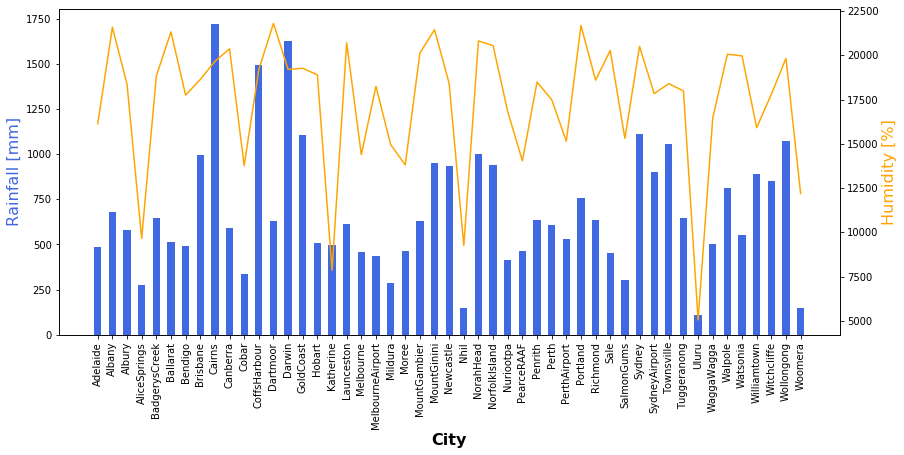

In [12]:
keys = [city for city, df in question1_df.groupby(['Location'])]

rainfall = question1_df.groupby(['Location']).sum()['Rainfall']/10
humidity = question1_df.groupby(['Location']).sum()['AvgHumidity']/10
location = question1_df['Location'].unique()

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.bar(keys, rainfall, width = 0.5, color = 'royalblue')
ax1.set_xlabel('City', size=16, weight='bold')
ax1.set_ylabel('Rainfall [mm]', size=16, color='royalblue')
ax1.set_xticklabels(keys,  rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(keys, humidity, color = 'orange')
ax2.set_ylabel('Humidity [%]', size=16, color='orange')

plt.show()

##### Question 2: What is average min and max temperature in Brisbane in each month?

In [13]:
city_condition = weather_data['Location'] == 'Brisbane'

question2_df = weather_data[['Location', 'Month', 'MinTemp', 'MaxTemp']][city_condition]

question2_df.groupby(['Month']).mean()

MinTemp  MaxTemp
Month                  
1         21.7     30.4
2         21.6     30.5
3         20.5     29.2
4         17.5     27.2
5         14.0     24.4
6         12.1     21.7
7         10.7     21.6
8         11.0     23.3
9         14.0     25.4
10        15.9     26.8
11        19.3     28.7
12        20.4     29.3

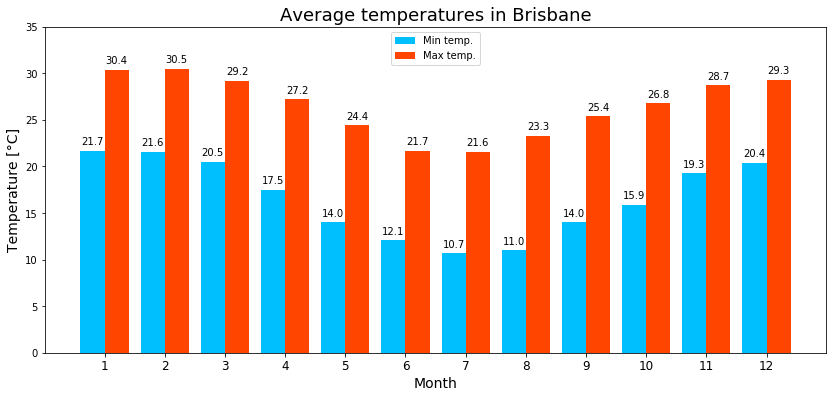

In [14]:
month = range(1,13)
min_temp = [round(n, 1) for n in (question2_df.groupby(['Month']).mean()['MinTemp'])]
max_temp = [round(m, 1) for m in (question2_df.groupby(['Month']).mean()['MaxTemp'])]

x = np.arange(len(month))
width = 0.6

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/3, min_temp, label='Min temp.', color='deepskyblue', width=0.4)
rects2 = ax.bar(x + width/3, max_temp, label='Max temp.', color='orangered', width=0.4)

ax.set_xlabel('Month', size = 14)
ax.set_ylabel('Temperature [\u00b0C]', size = 14)
ax.set_xticks(x)
ax.set_yticks([i for i in range(0,40,5)])
ax.set_xticklabels(month, size=12)
ax.set_title('Average temperatures in Brisbane', size=18)
ax.legend(loc='upper center')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 4 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

##### Question 3: What is the number of sunny days in Sydney?

In [15]:
city_condition = weather_data['Location'] == 'Sydney'

question3_df = weather_data[['Location', 'Date', 'AvgCloud']][city_condition]
question3_df

Location       Date  AvgCloud
29497   Sydney 2008-02-01       8.0
29498   Sydney 2008-02-02       7.0
29499   Sydney 2008-02-03       7.5
29500   Sydney 2008-02-04       8.0
29501   Sydney 2008-02-05       8.0
...        ...        ...       ...
32829   Sydney 2017-06-21       2.0
32830   Sydney 2017-06-22       2.0
32831   Sydney 2017-06-23       6.0
32832   Sydney 2017-06-24       3.5
32833   Sydney 2017-06-25       1.0

[3337 rows x 3 columns]

In [16]:
# Findind NAN values
question3_df[question3_df.isna().any(axis=1)]

Location       Date  AvgCloud
29846   Sydney 2009-01-15       NaN
30357   Sydney 2010-06-10       NaN
30361   Sydney 2010-06-14       NaN
30362   Sydney 2010-06-15       NaN
30365   Sydney 2010-06-19       NaN
...        ...        ...       ...
31075   Sydney 2012-06-30       NaN
31997   Sydney 2015-03-12       NaN
32299   Sydney 2016-01-08       NaN
32674   Sydney 2017-01-17       NaN
32702   Sydney 2017-02-14       NaN

[567 rows x 3 columns]

I've decided to drop all NaN values

In [17]:
question3_df.dropna(how='any', inplace=True)

#### Cloud cover scale (in octas):
- 0/8 - cloudless
- 1/8 - sunny
- 2/8 - scattered clouds
- 3/8 - slightly cloudy
- 4/8 - partly cloudy
- 5/8 - cloudy
- 6/8 - mostly cloudy
- 7/8 - nearly overcast
- 8/8 - overcast
- 9/8 - sky obscured

To estimate the number of sunny days I assumed:
- Sunny Day: clouds cover up to 25% of the sky (octa: 0-2) 
- Partly Sunny Day: clouds cover from 25 percent to 75 percent of the sky (octa: 2-6) 
- Cloudy: clouds cover more than 75 percent of the sky (octa: 6-9)  

Total days with sun: Sunny Days + Partly Sunny Days.

In [18]:
all_days = len(question3_df)
sunny_days = question3_df['AvgCloud'][question3_df['AvgCloud']<6].count()
cloudy_days = question3_df['AvgCloud'][question3_df['AvgCloud']>=6].count()

num_sunny = int(365.25*(sunny_days/all_days))
num_cloudy = int(365.25*(cloudy_days/all_days))

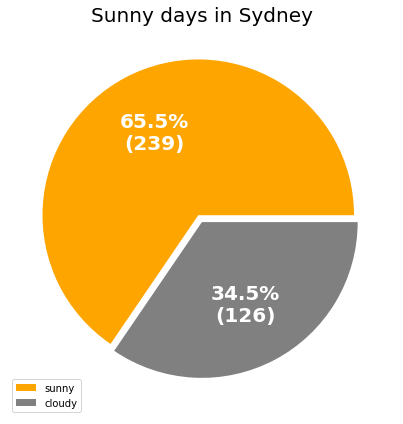

In [19]:
days = [num_sunny, num_cloudy]
labels = ['sunny', 'cloudy']

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

explode = (0.05, 0)

wedges, texts, autotexts = ax.pie(days, autopct=lambda pct: func(pct, days), textprops=dict(color="w"),
                                 colors=['orange', 'gray'], explode=explode)
plt.title('Sunny days in Sydney', size=20)
plt.setp(autotexts, size=20, weight="bold")
plt.legend(labels)
fig.tight_layout()

plt.show()

The number of days with the sun in Sydney is 239 per year.